In [1]:
import polars as pl


# 读取数据
data = pl.read_parquet("daily_data.pa")

df = data.sort('open_time').sort("symbol")

# 计算收益率
df = df.with_columns([
    (pl.col('close') / pl.col('close').shift(1).over('symbol') - 1).alias('return')
])

df = df.with_columns([
    ((pl.col('close') / pl.col('close').shift(1) - 1).abs() + 1).alias('return_adj')
])

N = 30

# 计算 cumprod，模拟窗口的累乘效果
df = df.with_columns([
    pl.col('return_adj').cumprod().over('symbol').alias('cumulative_return_product')
])

df = df.with_columns([
    (pl.col('cumulative_return_product') / pl.col('cumulative_return_product').shift(N).over('symbol')).alias('rolling_return_product')
])

# 计算过去N小时的 quote_volume 的滚动总和
df = df.with_columns([
    pl.col('quote_volume').rolling_sum(N).over('symbol').alias('cumulative_quote_volume')
])

# 计算 illq 因子
df = df.with_columns([
    (pl.col('rolling_return_product').log() / pl.col('cumulative_quote_volume')).alias('illq')
])

df

/var/folders/8p/_lylf4tn2yz39y4qkw9vg1jw0000gn/T/ipykernel_10325/3629863825.py:21: DeprecationWarning: `cumprod` is deprecated. It has been renamed to `cum_prod`.
  pl.col('return_adj').cumprod().over('symbol').alias('cumulative_return_product')


open_time,open,high,low,close,volume,close_time,quote_volume,count,taker_buy_volume,taker_buy_quote_volume,symbol,return,return_adj,cumulative_return_product,rolling_return_product,cumulative_quote_volume,illq
datetime[μs],f64,f64,f64,f64,f64,datetime[μs],f64,i64,f64,f64,str,f64,f64,f64,f64,f64,f64
2023-11-22 00:00:00,0.00478,0.004825,0.004076,0.004531,1.2701e10,2023-11-22 23:59:59.999,5.6368e7,320715,6.1849e9,2.7467e7,"""1000BONKUSDT""",null,null,null,null,null,null
2023-11-23 00:00:00,0.004531,0.004858,0.00393,0.004267,1.8971e10,2023-11-23 23:59:59.999,8.1590e7,573386,8.8982e9,3.8318e7,"""1000BONKUSDT""",-0.058265,1.058265,1.058265,null,null,null
2023-11-24 00:00:00,0.004267,0.004335,0.003835,0.00414,1.7169e10,2023-11-24 23:59:59.999,6.9929e7,475254,7.9410e9,3.2393e7,"""1000BONKUSDT""",-0.029763,1.029763,1.089763,null,null,null
2023-11-25 00:00:00,0.004143,0.0046,0.004084,0.00434,1.3093e10,2023-11-25 23:59:59.999,5.6988e7,501832,6.3891e9,2.7819e7,"""1000BONKUSDT""",0.048309,1.048309,1.142408,null,null,null
2023-11-26 00:00:00,0.004341,0.004473,0.0039,0.004039,8.2273e9,2023-11-26 23:59:59.999,3.4347e7,344203,3.8247e9,1.5980e7,"""1000BONKUSDT""",-0.069355,1.069355,1.22164,null,null,null
…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…
2024-03-08 00:00:00,0.5161,0.5819,0.4875,0.5575,1.8804e8,2024-03-08 23:59:59.999,1.0033e8,686024,8.9756e7,4.7898e7,"""ZRXUSDT""",0.080426,1.080426,2.6936e25,2.88467,1.1136e9,9.5136e-10
2024-03-09 00:00:00,0.5576,0.6067,0.5397,0.5785,9.4661e7,2024-03-09 23:59:59.999,5.3586e7,380425,4.6599725e7,2.6364e7,"""ZRXUSDT""",0.037668,1.037668,2.7950e25,2.960925,1.1559e9,9.3913e-10
2024-03-10 00:00:00,0.5785,0.8259,0.5671,0.8005,7.80136805e8,2024-03-10 23:59:59.999,5.9270e8,2616066,3.9341e8,2.9910e8,"""ZRXUSDT""",0.383751,1.383751,3.8676e25,4.007233,1.7340e9,8.0050e-10


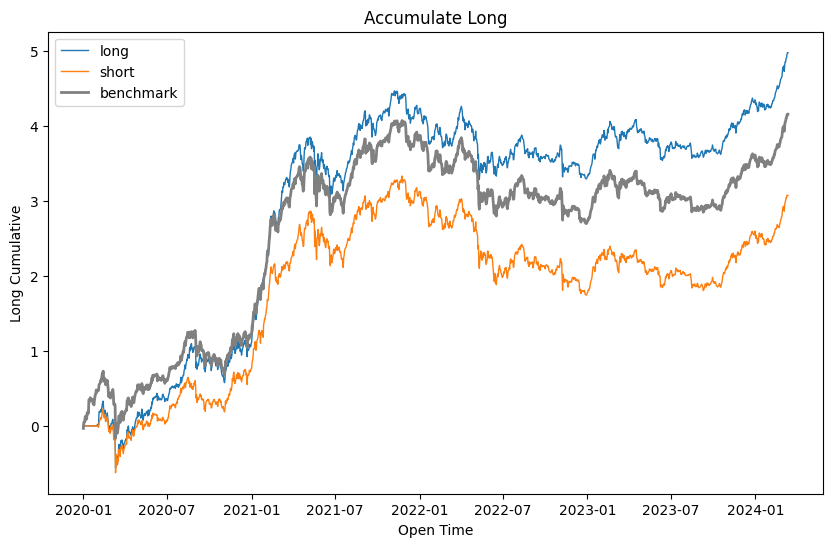

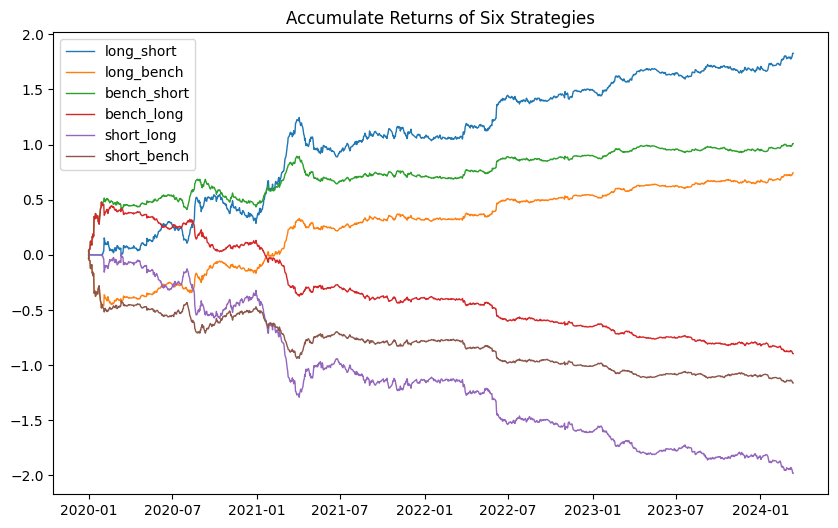

long: 
ann_return = 28.4246  sharpe = 6.1701  maxdd = 0.6694  calmar_ratio = 42.4617  

short: 
ann_return = 17.5463  sharpe = 3.9411  maxdd = 0.694  calmar_ratio = 25.2841  

bench: 
ann_return = 23.7448  sharpe = 5.2089  maxdd = 0.5174  calmar_ratio = 45.8928  

long_short: 
ann_return = 10.4403  sharpe = 7.7945  maxdd = 0.1694  calmar_ratio = 61.6129  

long_bench: 
ann_return = 4.2418  sharpe = 4.3125  maxdd = 0.4985  calmar_ratio = 8.5088  

bench_long: 
ann_return = -5.1178  sharpe = -5.2031  maxdd = 0.9294  calmar_ratio = -5.5066  

short_long: 
ann_return = -11.3163  sharpe = -8.4485  maxdd = 1.9752  calmar_ratio = -5.7292  

short_bench: 
ann_return = -6.6365  sharpe = -6.9064  maxdd = 1.1561  calmar_ratio = -5.7405  

bench_short: 
ann_return = 5.7605  sharpe = 5.9948  maxdd = 0.1485  calmar_ratio = 38.8031  



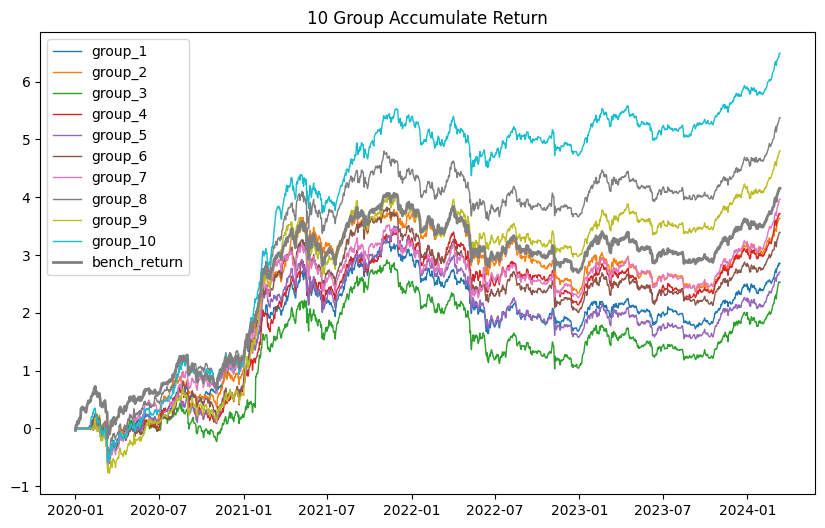

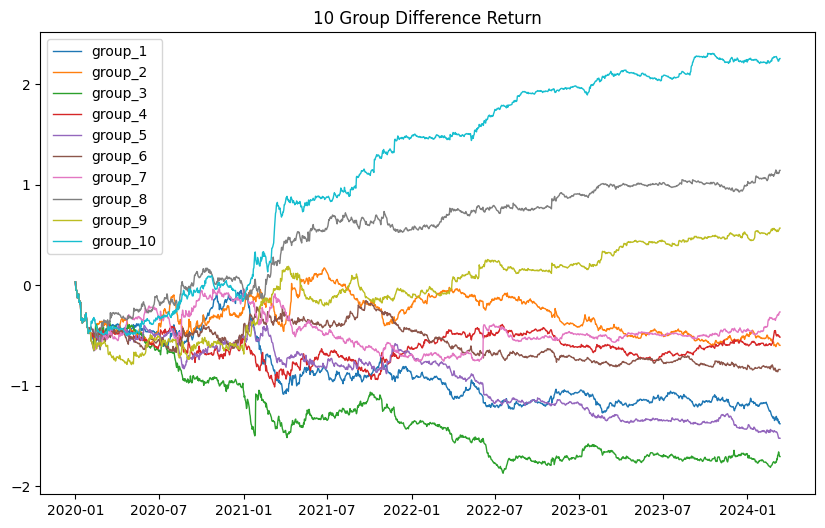

group_1: 
ann_return = 16.2956  sharpe = 3.8518  maxdd = 0.6272  calmar_ratio = 25.9803  

group_2: 
ann_return = 20.7592  sharpe = 4.3607  maxdd = 0.6927  calmar_ratio = 29.9702  

group_3: 
ann_return = 14.4303  sharpe = 3.0148  maxdd = 0.6521  calmar_ratio = 22.1288  

group_4: 
ann_return = 21.2271  sharpe = 4.4644  maxdd = 0.6705  calmar_ratio = 31.659  

group_5: 
ann_return = 15.4689  sharpe = 3.26  maxdd = 0.7239  calmar_ratio = 21.369  

group_6: 
ann_return = 19.3841  sharpe = 4.0965  maxdd = 0.7485  calmar_ratio = 25.896  

group_7: 
ann_return = 22.6608  sharpe = 4.6936  maxdd = 0.7173  calmar_ratio = 31.5899  

group_8: 
ann_return = 30.719  sharpe = 6.518  maxdd = 0.5885  calmar_ratio = 52.1953  

group_9: 
ann_return = 27.4343  sharpe = 5.6285  maxdd = 0.8101  calmar_ratio = 33.8664  

group_10: 
ann_return = 37.0848  sharpe = 7.7722  maxdd = 0.6905  calmar_ratio = 53.7036  

-----------------------------------------
group_difference_1: 
ann_return = -7.8872  sharpe = -4

In [2]:
factors = df.select(['open_time', 'symbol', 'illq'])

from factor_analysis.factor_analysis import FactorAnalysis

# 使用示例
analysis = FactorAnalysis(factors, data)
analysis.run_full_analysis()